# 1) Finder Class and its Methods

In [1]:
import itertools
import numpy as np

class Finder:

    # Defining attributes of class (Constructor)
    def __init__(self, dist_mat, initial_route): 
        self.dist_mat = dist_mat
        self.num_cities = len(self.dist_mat)
        self.initial_route = initial_route
        self.best_route = []
        self.best_distance = 0
        self.distances = []

    # Update Existing route with new one
    def update(self, new_route, new_distance):
        self.best_distance = new_distance
        self.best_route = new_route
        return self.best_distance, self.best_route

    # 
    def exhaustive_search(self):
        self.best_route = [0] + list(range(1, self.num_cities))
        self.best_distance = self.total_path_distance(self.dist_mat, self.best_route)

        for new_route in itertools.permutations(list(range(1, self.num_cities))):
            new_distance = self.total_path_distance(self.dist_mat, [0] + list(new_route[:]))

            if new_distance < self.best_distance:
                self.update([0] + list(new_route[:]), new_distance)
                self.distances.append(self.best_distance)

        return self.best_route, self.best_distance, self.distances

    def two_opt(self, improve_threshold=0.01):
        self.best_route = self.initial_route
        self.best_distance = self.total_path_distance(self.dist_mat, self.best_route)
        improve_factor = 1
        
        while improve_factor > improve_threshold:
            previous_best = self.best_distance
            for swap_first in range(1, self.num_cities - 2):
                for swap_last in range(swap_first + 1, self.num_cities - 1):
                    before_start = self.best_route[swap_first - 1]
                    start = self.best_route[swap_first]
                    end = self.best_route[swap_last]
                    after_end = self.best_route[swap_last+1]
                    before = self.dist_mat[before_start][start] + self.dist_mat[end][after_end]
                    after = self.dist_mat[before_start][end] + self.dist_mat[start][after_end]
                    if after < before:
                        new_route = self.swap(self.best_route, swap_first, swap_last)
                        new_distance = self.total_path_distance(self.dist_mat, new_route)
                        self.update(new_route, new_distance)

            improve_factor = 1 - self.best_distance/previous_best
        return self.best_route, self.best_distance, self.distances

    @staticmethod
    def total_path_distance(dist_mat, path):
        path_distance = 0
        for ind in range(len(path) - 1):
            path_distance += dist_mat[path[ind]][path[ind + 1]]
        return float("{0:.2f}".format(path_distance))

    @staticmethod
    def swap(path, swap_first, swap_last):
        path_updated = np.concatenate((path[0:swap_first],
                                       path[swap_last:-len(path) + swap_first - 1:-1],
                                       path[swap_last + 1:len(path)]))
        return path_updated.tolist()

# 2) RouteFinder Class and solve() method

In [2]:
pip install random2

In [3]:
import random2
import time

class Route:
    def __init__(self, dist_mat, order_list, iterations = 100, writer_flag=False, method='py2opt'):
        self.dist_mat = dist_mat
        self.iterations = iterations
        self.writer_flag = writer_flag
        self.order_list = order_list

class RouteFinder:
    def __init__(self, dist_mat, cities_names, iterations=5, writer_flag=False, method='py2opt'):
        self.dist_mat = dist_mat
        self.iterations = iterations
        self.writer_flag = writer_flag
        self.cities_names = cities_names

    def solve(self):
        start_time = round(time.time() * 1000)
        elapsed_time = 0
        iteration = 0
        best_distance = 0
        best_route = []
        best_distances = []

        while iteration < self.iterations:
            num_cities = len(self.dist_mat)
            #print(round(elapsed_time), 'msec')
            init_path = [0] + random2.sample(range(1, num_cities), num_cities - 1)
            tsp = Finder(self.dist_mat, init_path)
            new_route, new_distance, distances = tsp.two_opt()

            if iteration == 0:
                best_distance = new_distance
                best_route = new_route
            else:
                pass

            if new_distance < best_distance:
                best_distance = new_distance
                best_route = new_route
                best_distances = distances

            elapsed_time = round(time.time() * 1000) - start_time
            iteration += 1

        if self.writer_flag:
            self.writer(best_route, best_distance, self.cities_names)

        if self.cities_names:
            best_route = [self.cities_names[i] for i in best_route]
            return best_distance, best_route
        else:
            return best_distance, best_route

    @staticmethod
    def writer(best_route, best_distance, cities_names):
        f = open("../results.txt", "w+")
        for i in best_route:
            f.write(cities_names[i])
            f.write("\n")
            print(cities_names[i])
        f.write(str(best_distance))
        f.close()

# 3) distance() function

In [4]:
def distance(C,D):
    A = C.copy()
    B = D.copy()
    if A[0]%3 == 0: A[0]=A[0]+1 
    else : A[0]=A[0]-1
    if B[0]%3 == 0: B[0]=B[0]+1
    else : B[0]=B[0]-1            

    line_bel_A = 6 * (A[1]//7) + 1
    line_bel_B = 6 * (B[1]//7) + 1

    if line_bel_A == line_bel_B:
        return min((A[1]-line_bel_A) + (B[1]-line_bel_B) + abs(A[0]-B[0]) + 1,
                   (line_bel_A + 6 - A[1]) + (line_bel_B + 6 - B[1]) + abs(A[0]-B[0]) + 1)

    return abs(A[0]-B[0]) + abs(A[1]-B[1]) + 1

# 4) getorganized() function for getting organised products in warehouse

In [5]:
# importing min heap libraries
from heapq import heapify, heappush, heappop

# Naming to put element in Dictionary
def getname(a):    
    temp = "product_"
    name = temp + str(a)
    if a <= 9 :
        name  = name + " "
      
    return name

# Core Function to return Dictionary
def getorganized(N,M):
    box = {}
    arr1 = []
    arr2 = []
    
    for i in range(1,N):
        if (i-1)%3 != 0: arr1.append(i)
    for i in range(1,M):
        if (i-1)%6 != 0: arr2.append(i)
    
    st = 0
    end = st + 4
    prod = 1
    heap = []
    heapify(heap)
    
    for k in range(len(arr2)//5):
        for i in range(len(arr1)):
            for j in range(st,end+1):
                heappush(heap,(arr1[i]+arr2[j], [arr1[i],arr2[j]]))
                
            if i%2 == 1:
                name = getname(prod)
                box[name] = heap
                prod = prod + 1
                heap = []
                heapify(heap)
                
        st = end + 1
        end = st + 4
        
    return box

# 5) getrandom() function for getting random placement of products in warehouse

In [6]:
def getrandom(N,M):
    
    box = {}
    arr1 = []
    arr2 = []
    loc = []
    
    for i in range(1,N):
        if (i-1)%3 != 0: arr1.append(i)
    for i in range(1,M):
        if (i-1)%6 != 0: arr2.append(i)
    
    for i in range(len(arr1)):
        for j in range(len(arr2)):
            loc.append((arr1[i]+arr2[j], [arr1[i],arr2[j]]))
    
    np.random.shuffle(loc)
    
    prod = 1
    name = getname(prod)
    box[name] = []
    heapify(box[name])
    
    for i in range(len(loc)):
 
        heappush(box[name], loc[i])  
        
        if ((i+1)%10 == 0 and i+1 != len(loc)): 
            prod = prod + 1
            name = getname(prod)
            box[name] = []
            heapify(box[name])
            
    return box

# 6) Genrating two dictionaries 1) Organised and 2) Randomized 

In [7]:
avail_items = getorganized(25,25)
avail_items_1 = getrandom(25,25)

## a) Visualization of **i. Organised** and **ii. Randomized** version of product placement in warehouse



In [8]:
from random import randint
import seaborn as sns
import matplotlib.pyplot as plt

def plot_struct(struct,x):
    
    color = sns.color_palette('husl', n_colors=len(struct))     # a list of RGB tuples

    plt.title(x,fontsize=23)
    color_count = 0
    for i in struct:
        for j in struct[i]:
            plt.scatter([j[1][0]],[j[1][1]],color=color[color_count], linewidths = 4)
        color_count = color_count + 1

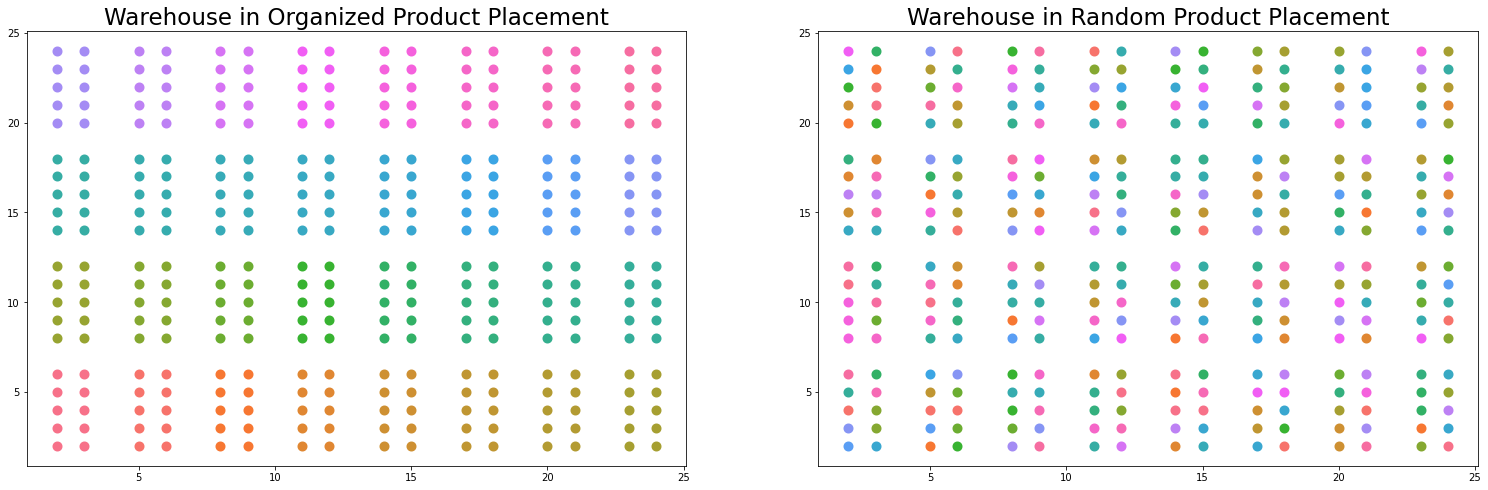

In [9]:
struct_1 = avail_items.copy()
struct_2 = avail_items_1.copy()

plt.subplots(figsize=(26, 8))
plt.subplot(1, 2, 1)
plot_struct(struct_1, 'Warehouse in Organized Product Placement')
plt.subplot(1, 2, 2)
plot_struct(struct_2, 'Warehouse in Random Product Placement')

# 6) User's input orders for picking products from Warehouse

In [10]:
n = int(input("Enter no. of products you want to order: "))
order = list(input("Enter products no.s you want to order: ").split())

if len(order) != n: 
  print("\nPlease enter the same numbers of items you mentioned above.\n")
else:
  for i in range(n):
    if len(order[i]) == 1: order[i] = "product_"+ str(order[i]) + " "
    else: order[i] = "product_"+ str(order[i]) 
  

Enter no. of products you want to order: 15
Enter products no.s you want to order: 1 5 10 15 20 25 30 35 3 6 9 12 14 17 23 


# **7) For Organized Warehouse**

## a) Lists of Orders available and Not Available

In [11]:
X,Y = [],[]
for i in order:
    if i in avail_items:
        if len(avail_items[i]) != 0:
            X.append(i)
    else : Y.append(i)
print("\nYour Order List is: ", order, "\n")
print("Orders Available in Warehouse: ", X, "\n")
print("Orders Not Available in Warehouse: ", Y)


Your Order List is:  ['product_1 ', 'product_5 ', 'product_10', 'product_15', 'product_20', 'product_25', 'product_30', 'product_35', 'product_3 ', 'product_6 ', 'product_9 ', 'product_12', 'product_14', 'product_17', 'product_23'] 

Orders Available in Warehouse:  ['product_1 ', 'product_5 ', 'product_10', 'product_15', 'product_20', 'product_25', 'product_30', 'product_3 ', 'product_6 ', 'product_9 ', 'product_12', 'product_14', 'product_17', 'product_23'] 

Orders Not Available in Warehouse:  ['product_35']


In [12]:
X_loc = []

for i in X:
    X_loc.append(heappop(avail_items[i])[1])

X_dict = {}
for i in range(len(X)):
    X_dict[X[i]] = X_loc[i]

## b) **Distance Matrix** for given orders

In [13]:
dist_mat = np.zeros([len(X),len(X)], dtype=int)

for i in range(len(X)):
    for j in range(i+1,len(X)):
        dist_mat[i][j] = dist_mat[j][i] = distance(X_dict[X[i]].copy(),X_dict[X[j]].copy())

print(dist_mat, "\n")
data = np.array(dist_mat)
import pandas as pd
pd.DataFrame(data,X,X)

[[ 0 15 10 25 22 19 34  9 18  7 16 22 13 31]
 [15  0 16 13 16 31 22  9  6 19 10 10 25 19]
 [10 16  0 18 13 16 25 10 19  6  9 15 10 22]
 [25 13 18  0 16 31 16 19 10 21 12  6 25  7]
 [22 16 13 16  0 14 11 16 19 16  7 13 12 12]
 [19 31 16 31 14  0 14 25 34 13 22 28  5 23]
 [34 22 25 16 11 14  0 28 19 28 19 13 20  8]
 [ 9  9 10 19 16 25 28  0 12 13 10 16 19 25]
 [18  6 19 10 19 34 19 12  0 22 13  7 28 16]
 [ 7 19  6 21 16 13 28 13 22  0 12 18  7 25]
 [16 10  9 12  7 22 19 10 13 12  0  9 16 16]
 [22 10 15  6 13 28 13 16  7 18  9  0 22 10]
 [13 25 10 25 12  5 20 19 28  7 16 22  0 21]
 [31 19 22  7 12 23  8 25 16 25 16 10 21  0]] 



,product_1,product_5,product_10,product_15,product_20,product_25,product_30,product_3,product_6,product_9,product_12,product_14,product_17,product_23
product_1,0,15,10,25,22,19,34,9,18,7,16,22,13,31
product_5,15,0,16,13,16,31,22,9,6,19,10,10,25,19
product_10,10,16,0,18,13,16,25,10,19,6,9,15,10,22
product_15,25,13,18,0,16,31,16,19,10,21,12,6,25,7
product_20,22,16,13,16,0,14,11,16,19,16,7,13,12,12
product_25,19,31,16,31,14,0,14,25,34,13,22,28,5,23
product_30,34,22,25,16,11,14,0,28,19,28,19,13,20,8
product_3,9,9,10,19,16,25,28,0,12,13,10,16,19,25
product_6,18,6,19,10,19,34,19,12,0,22,13,7,28,16
product_9,7,19,6,21,16,13,28,13,22,0,12,18,7,25


## c) **RouteFinder object** and solving using **solve()** function 

In [14]:
first_order = RouteFinder(dist_mat, X, iterations=100)
a,b = first_order.solve()
print('2-optimal distance for given order is ', a, ' units')
print('2-optimal route is \n', b)

2-optimal distance for given order is  97.0  units
2-optimal route is 
 ['product_1 ', 'product_3 ', 'product_5 ', 'product_6 ', 'product_14', 'product_15', 'product_23', 'product_30', 'product_20', 'product_12', 'product_10', 'product_9 ', 'product_17', 'product_25']


## d) Visualization of Routes

### i) Initial Non-Optimized Path

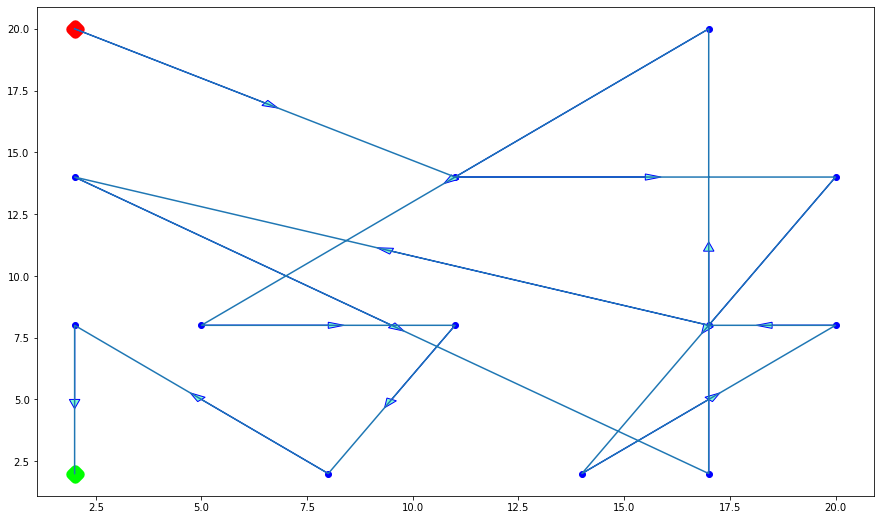

In [15]:
import matplotlib.pyplot as plt

c = b.copy()
np.random.shuffle(c)
xx_c = []
yy_c = []
for i in c:
    xx_c.append(X_dict[i][0])
    yy_c.append(X_dict[i][1])

plt.figure(figsize=(15,9))
plt.plot(xx_c, yy_c)
plt.scatter(xx_c,yy_c,c='b')
plt.scatter([X_dict[b[0]][0]],[X_dict[b[0]][1]],c='lime', marker='D', linewidths=10)
plt.scatter([X_dict[b[len(b)-1]][0]],[X_dict[b[len(b)-1]][1]],c='r', marker='D', linewidths=10)
# Increasing head_width of the arrow by setting head_width parameter
for i in range(1,len(xx_c)):
    plt.arrow(xx_c[i-1], yy_c[i-1], (xx_c[i]-xx_c[i-1])/2, (yy_c[i]-yy_c[i-1])/2,head_width = 0.25,width = 0.005,fc ='aquamarine', ec ='b')

plt.show()

### ii) Final Optimized Path

In [16]:
for i in b:
    print(i, X_dict[i])

product_1  [2, 2]
product_3  [8, 2]
product_5  [14, 2]
product_6  [17, 2]
product_14 [17, 8]
product_15 [20, 8]
product_23 [20, 14]
product_30 [17, 20]
product_20 [11, 14]
product_12 [11, 8]
product_10 [5, 8]
product_9  [2, 8]
product_17 [2, 14]
product_25 [2, 20]


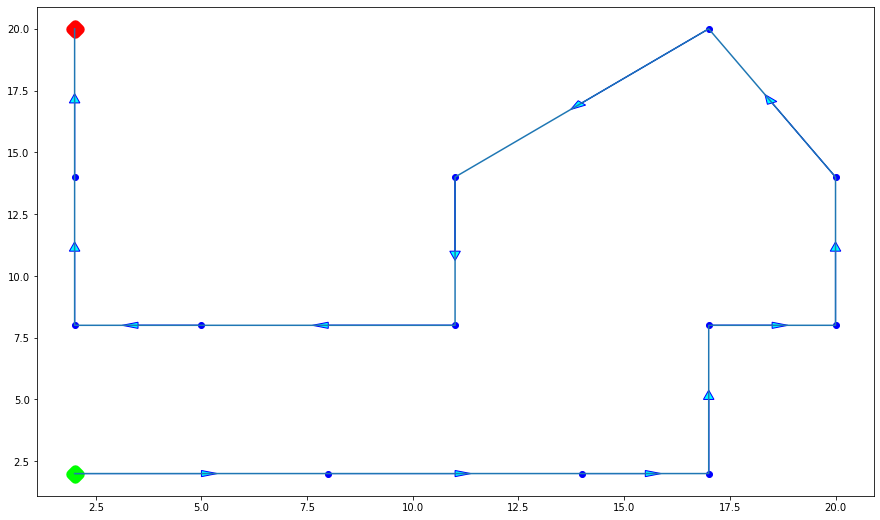

In [17]:
import matplotlib.pyplot as plt

xx = []
yy = []
for i in b:
    xx.append(X_dict[i][0])
    yy.append(X_dict[i][1])

plt.figure(figsize=(15,9))
plt.plot(xx, yy)
plt.scatter(xx,yy,c='b')
plt.scatter([X_dict[b[0]][0]],[X_dict[b[0]][1]],c='lime', marker='D', linewidths=10)
plt.scatter([X_dict[b[len(b)-1]][0]],[X_dict[b[len(b)-1]][1]],c='r', marker='D', linewidths=10)
# Increasing head_width of
# the arrow by setting
# head_width parameter
for i in range(1,len(xx)):
    plt.arrow(xx[i-1], yy[i-1], (xx[i]-xx[i-1])/2, (yy[i]-yy[i-1])/2,head_width = 0.25,width = 0.005,fc ='aqua', ec ='b')

plt.show()

# 8) For Random Placement Warehouse

## a) List of Orders available and Not available

In [18]:
X1,Y1 = [],[]
for i in order:
    if i in avail_items_1:
        if len(avail_items_1[i]) != 0:
            X1.append(i)
    else : Y1.append(i)
print("\nYour Order List is: ", order, "\n")
print("Orders Available in Warehouse: ", X, "\n")
print("Orders Not Available in Warehouse: ", Y)

X_loc_1 = []
for i in X1:
    X_loc_1.append(heappop(avail_items_1[i])[1])

X_dict_1 = {}
for i in range(len(X1)):
    X_dict_1[X1[i]] = X_loc_1[i]


Your Order List is:  ['product_1 ', 'product_5 ', 'product_10', 'product_15', 'product_20', 'product_25', 'product_30', 'product_35', 'product_3 ', 'product_6 ', 'product_9 ', 'product_12', 'product_14', 'product_17', 'product_23'] 

Orders Available in Warehouse:  ['product_1 ', 'product_5 ', 'product_10', 'product_15', 'product_20', 'product_25', 'product_30', 'product_3 ', 'product_6 ', 'product_9 ', 'product_12', 'product_14', 'product_17', 'product_23'] 

Orders Not Available in Warehouse:  ['product_35']


## b) **Distance Matrix** for given orders

In [19]:
dist_mat_1 = np.zeros([len(X1),len(X1)], dtype=int)

for i in range(len(X1)):
    for j in range(i+1,len(X1)):
        dist_mat_1[i][j] = dist_mat_1[j][i] = distance(X_dict_1[X[i]].copy(),X_dict_1[X[j]].copy())

print(dist_mat_1, "\n")
data_1 = np.array(dist_mat_1)
import pandas as pd
pd.DataFrame(data_1,X1,X1)

[[ 0  5 12 16 12 16  9 13 10 18 16 13 19 10]
 [ 5  0 16 20 14 20 11 17 14 22 20 13 23 14]
 [12 16  0 13  9  7  6  4  7 15  7 10 10  7]
 [16 20 13  0  7  9 10 12 11  7  9  8  6 15]
 [12 14  9  7  0  7  6 10  7  9  7  4 10 13]
 [16 20  7  9  7  0 10  6  9 13  3  8  6  9]
 [ 9 11  6 10  6 10  0  7  4 12 10  7 13 10]
 [13 17  4 12 10  6  7  0  6 16  6 11  9  6]
 [10 14  7 11  7  9  4  6  0 13  9  8 12  9]
 [18 22 15  7  9 13 12 16 13  0 13 10 10 19]
 [16 20  7  9  7  3 10  6  9 13  0  8  6  9]
 [13 13 10  8  4  8  7 11  8 10  8  0 11 14]
 [19 23 10  6 10  6 13  9 12 10  6 11  0 12]
 [10 14  7 15 13  9 10  6  9 19  9 14 12  0]] 



,product_1,product_5,product_10,product_15,product_20,product_25,product_30,product_3,product_6,product_9,product_12,product_14,product_17,product_23
product_1,0,5,12,16,12,16,9,13,10,18,16,13,19,10
product_5,5,0,16,20,14,20,11,17,14,22,20,13,23,14
product_10,12,16,0,13,9,7,6,4,7,15,7,10,10,7
product_15,16,20,13,0,7,9,10,12,11,7,9,8,6,15
product_20,12,14,9,7,0,7,6,10,7,9,7,4,10,13
product_25,16,20,7,9,7,0,10,6,9,13,3,8,6,9
product_30,9,11,6,10,6,10,0,7,4,12,10,7,13,10
product_3,13,17,4,12,10,6,7,0,6,16,6,11,9,6
product_6,10,14,7,11,7,9,4,6,0,13,9,8,12,9
product_9,18,22,15,7,9,13,12,16,13,0,13,10,10,19


## c) **RouteFinder object** and solving using **solve()** function 

In [20]:
first_order_1 = RouteFinder(dist_mat_1, X1, iterations=100)
a1,b1 = first_order_1.solve()
print('2-optimal distance for given order is ', a1, ' units')
print('2-optimal route is \n', b1)

2-optimal distance for given order is  80.0  units
2-optimal route is 
 ['product_1 ', 'product_5 ', 'product_30', 'product_6 ', 'product_20', 'product_14', 'product_9 ', 'product_15', 'product_17', 'product_12', 'product_25', 'product_10', 'product_3 ', 'product_23']


## d) Visualization of Route

### i) Final Optimized Route

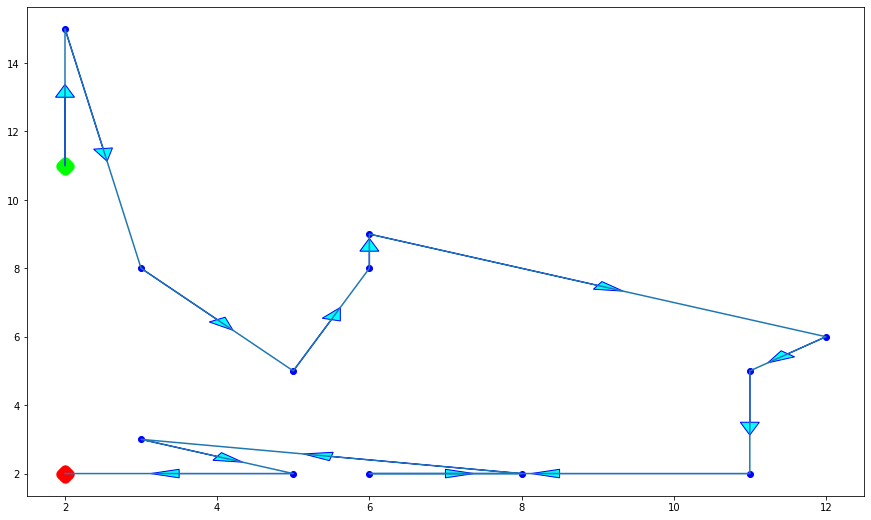

In [21]:
xx1 = []
yy1 = []
for i in b1:
    xx1.append(X_dict_1[i][0])
    yy1.append(X_dict_1[i][1])

plt.figure(figsize=(15,9))
plt.plot(xx1, yy1)
plt.scatter(xx1,yy1,c='b')
plt.scatter([X_dict_1[b1[0]][0]],[X_dict_1[b1[0]][1]],c='lime', marker='D', linewidths=10)
plt.scatter([X_dict_1[b1[-1]][0]],[X_dict_1[b1[-1]][1]],c='r', marker='D', linewidths=10)

# Increasing head_width of the arrow by setting head_width parameter
for i in range(1,len(xx1)):
    plt.arrow(xx1[i-1], yy1[i-1], (xx1[i]-xx1[i-1])/2, (yy1[i]-yy1[i-1])/2,head_width = 0.25,width = 0.005,fc ='aqua', ec ='b')

plt.show()